In [11]:
import numpy as np
from matplotlib import pyplot as plt

from cnvm import Parameters
from cnvm.collective_variables import OpinionShares
from cnvm.network_generator import ErdosRenyiGenerator
from cnvm.utils import sample_many_runs, calc_rre_traj

In [12]:
num_opinions = 3
t_max = 100

r = np.array([[0, .8, .2],
              [.2, 0, .8],
              [.8, .2, 0]])
r_tilde = 0.01 * np.array([[0, .9, .7],
                           [.7, 0, .9],
                           [.9, .7, 0]])

cv = OpinionShares(num_opinions, normalize=True)

In [13]:
num_agents = [200, 1000, 5000]
num_samples = [500, 100, 10]
c_list = []

for n_a, n_samples in zip(num_agents, num_samples):
    network_gen = ErdosRenyiGenerator(n_a, p=0.1)

    params = Parameters(
        num_opinions=num_opinions,
        network_generator=network_gen,
        r=r,
        r_tilde=r_tilde,
    )

    x_init = np.zeros((1, n_a))
    x_init[0, :int(0.2 * n_a)] = 1
    x_init[0, int(0.6 * n_a):] = 2

    t, c = sample_many_runs(params, x_init, t_max, 10 * t_max, n_samples, collective_variable=cv)
    c_list.append(c[0])

In [14]:
t_rre, c_rre = calc_rre_traj(params, c_list[-1][0, 0, :], t_max)

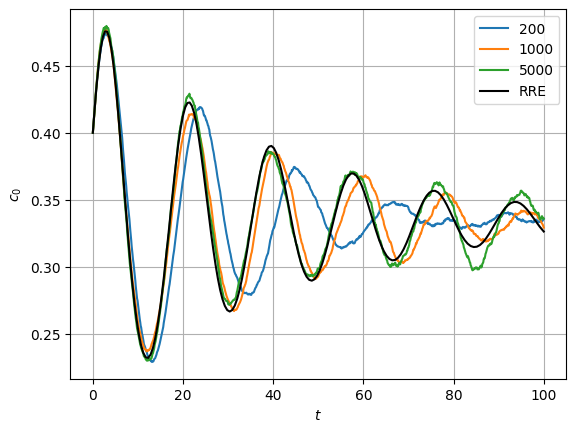

In [16]:
for n_a, c in zip(num_agents, c_list):
    plt.plot(t, np.mean(c[:, :, 0], axis=0), label=f"{n_a}")
plt.plot(t_rre, c_rre[:, 0], "k", label="RRE")
plt.grid()
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$c_0$")
plt.show()